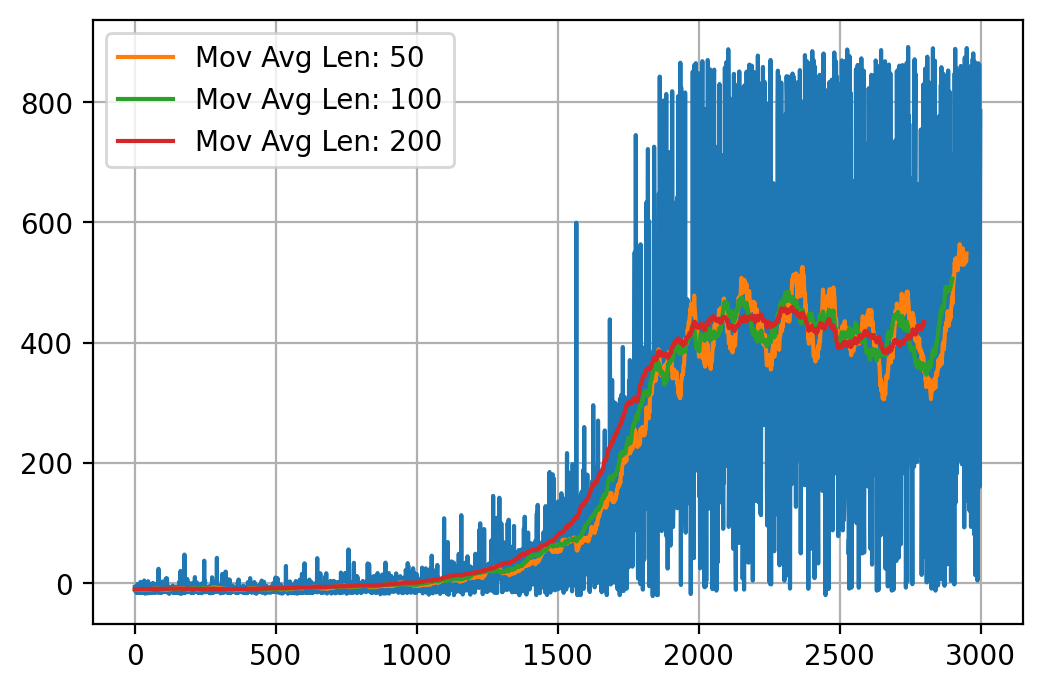

In [1]:
import pickle as pkl
from matplotlib import pyplot as plt
import glob
import os
import numpy as np

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

checkpoint_path = 'data/square'
rew_file = sorted(glob.glob(os.path.join(checkpoint_path,'*.p')),key=os.path.getmtime)[-1]
with open(rew_file,'rb') as f:
    rewards,frames = pkl.load(f)

plt.figure(dpi=200)
plt.plot(rewards)

for win in [50,100,200]:    
    mov_avg_rewards = moving_average(rewards,win)
    plt.plot(mov_avg_rewards,label='Mov Avg Len: '+str(win))

#plt.plot(mov_avg_rewards)
plt.grid()
plt.legend()

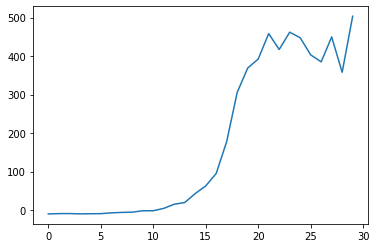

In [2]:
end_rewards = []

rew_files = sorted(glob.glob(os.path.join(checkpoint_path,'*.p')),key=os.path.getmtime)

for rew_f in rew_files:
    with open(rew_f,'rb') as f:
        rewards,frames = pkl.load(f)
        end_rewards.append(np.mean(rewards[-100:-1]))

plt.plot(end_rewards)